In [6]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import sturm_liouville_bdd, sturm_liouville_halfline
from specpol.plot import plot_ritz

In [7]:
from matplotlib import colormaps
def plot(ritz_results: Dict[int, np.array], dbm=None):
    # plot the approximation with some added bars and lines
    if dbm is not None:
        specs = {
            key: np.array([v for v in ritz_results[key] if v.imag > dbm]) for key in ritz_results
        }
    else:
        specs = ritz_results

    viridis = colormaps["viridis"].resampled(len(specs))

    fig = plt.figure(dpi=300)

    ax1 = fig.add_subplot()
    ax1.set_prop_cycle(color=viridis.colors)

    for i in specs:
        ax1.scatter([i] * len(specs[i]), specs[i].real, s=8)

    ax1.set_xlabel("size of Ritz matrix (number of rows/columns)")
    ax1.set_ylabel("real part of eigenvalues of the Ritz matrix")

    ax1.set_ylim(-0.1, 0)
    ax1.axhline(-1/16, linestyle="--", alpha=0.6)
    ax1.axhline(-1/36, linestyle="--", alpha=0.6)
    ax1.axhline(-1/64, linestyle="--", alpha=0.6)
    ax1.axhline(-1/100, linestyle="--", alpha=0.6)
    ax1.axhline(-1/144, linestyle="--", alpha=0.6)
    ax1.axhline(-1/196, linestyle="--", alpha=0.6)

    plt.show()

In [13]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    if x == 0:
        return potential(x+0.0001)
    return -1/x + 2/(x**2)

In [14]:
rusl = {}
vc = {}
for i in tqdm(range(50, 175, 25)):
    rusl[i] = sturm_liouville_halfline(potential, i, 200, np.pi/2)

100%|██████████| 5/5 [01:00<00:00, 12.17s/it]


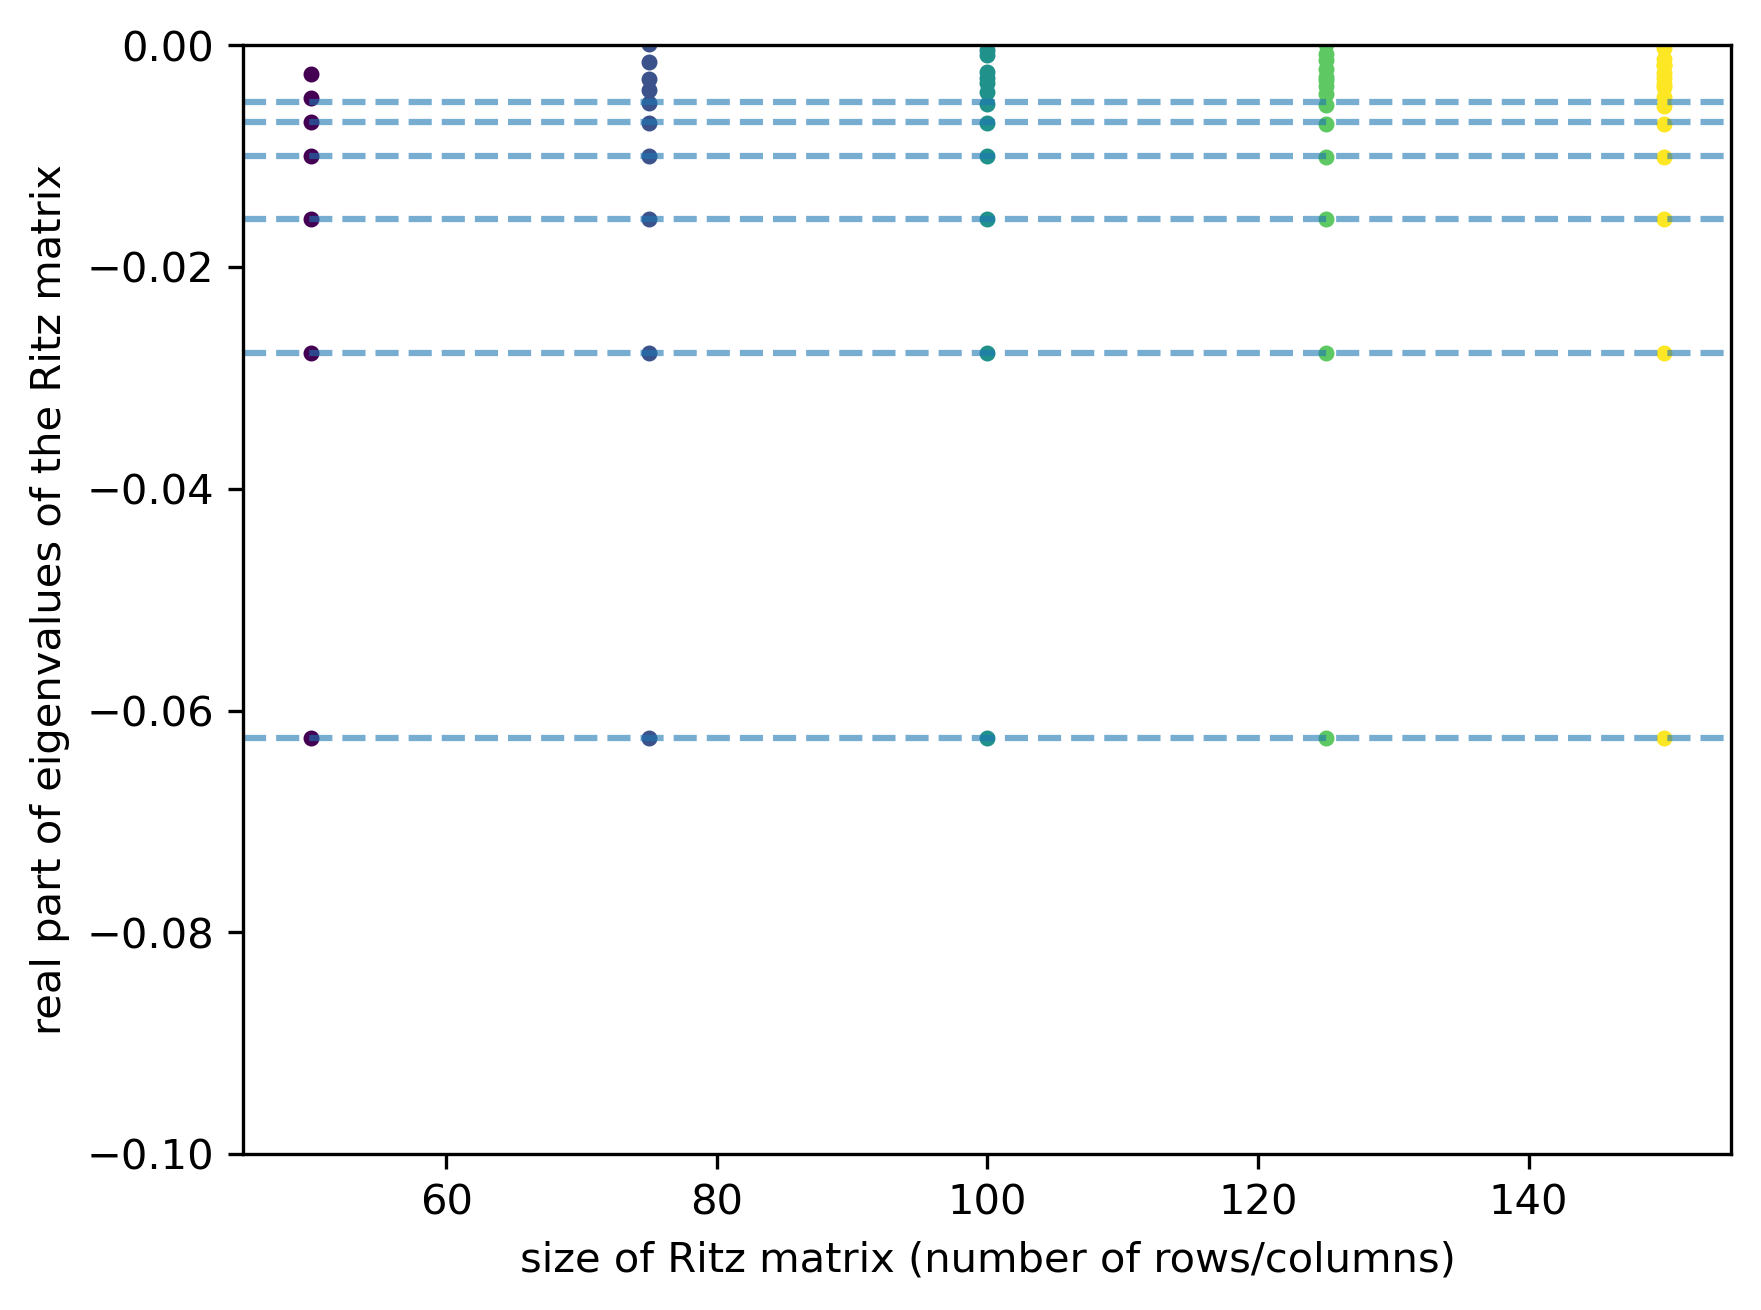

In [15]:
plot(rusl)

In [16]:
rusl = sturm_liouville_halfline(potential, 100, 200, np.pi/2)
np.set_printoptions(threshold=np.inf)
print([(i, rusl[i]) for i in range(100) if rusl[i] < 0])

[(57, (-0.06249999999978248+0j)), (68, (-0.027777777778024638+0j)), (75, (-0.015625032826291192+0j)), (78, (-0.010015222021303727+0j)), (81, (-0.006997480921694639+0j)), (87, (-0.00527749416940852+0j)), (90, (-0.004179436336913741+0j)), (95, (-0.003399004650688182+0j)), (96, (-0.0029180798780183187+0j)), (97, (-0.0008847397231437192+0j)), (98, (-0.00039908316897259476+0j)), (99, (-0.0023891296661210895+0j))]


In [12]:
plt.plot(vc[250][:,25])

KeyError: 250

In [ ]:
[1/(2*k+4)**2 for k in range(0, 6)]

[0.0625,
 0.027777777777777776,
 0.015625,
 0.01,
 0.006944444444444444,
 0.00510204081632653]

In [ ]:
14**2

196

In [ ]:
1/196

0.00510204081632653